# Path solution


[![Slides](https://img.shields.io/badge/🦌-ReHLine-blueviolet)](https://rehline-python.readthedocs.io/en/latest/)

We use the simulated data together with different `loss` function and `constraint` to solve the optimization problem. Meanwhile, a plot of path solution concerning different C values will be displayed.


*  All the following test used `warm-start` technique.



#### SVM with `nonnegative` constraint

In [ ]:
## generate data
import numpy as np

np.random.seed(1042)
n, d, C = 1000, 5, 0.5
X = np.random.randn(n, d)
beta0 = np.random.randn(d)
y = np.sign(X.dot(beta0) + np.random.randn(n))

In [ ]:
## define loss function
loss = {'name': 'SVM'}

## define constraint
constraint = [{'name':'nonnegative'}]

## define value of Cs
Cs = np.logspace(-5,3,20)


PLQ ERM Path Solution Results
C Value        Iterations     Time (s)            Loss                L2 Norm             
------------------------------------------------------------------------------------------
1e-05          3              0.001964            995.663000          0.006600            
2.637e-05      1              0.000679            988.564800          0.017400            
6.952e-05      1              0.000593            969.850000          0.045800            
0.0001833      1              0.000593            920.509600          0.120700            
0.0004833      2              0.000522            791.465800          0.316700            
0.001274       8              0.000578            634.164300          0.590300            
0.00336        13             0.000771            541.042400          0.860000            
0.008859       16             0.000767            495.021900          1.113600            
0.02336        48             0.000763            474.34340

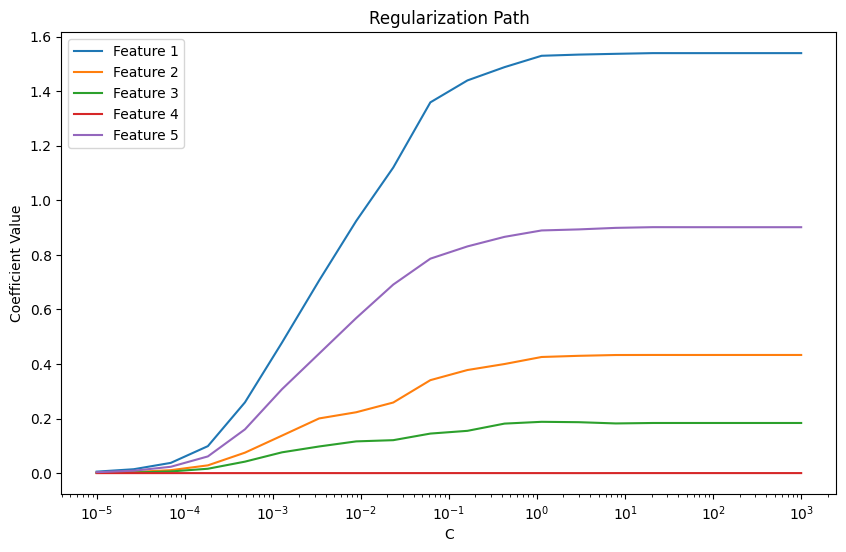

In [ ]:
## solve SVM and show path solution via `plqERM_Ridge_path_sol`
from rehline import plqERM_Ridge_path_sol

Cs, times, n_iters, losses, norms, coefs = plqERM_Ridge_path_sol(
     X, y, loss=loss, Cs=Cs, max_iter=200000,tol=1e-4,verbose=2,
     warm_start=True, constraint=constraint, return_time=True)

#### SVM with `fair` constraint

In [ ]:
## simulate data
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

n, d = 10000, 5
X, y = make_classification(n_samples=n, n_features=d, n_redundant=0)
## convert y to +1/-1
y = 2*y - 1
X = scaler.fit_transform(X)

In [ ]:
## we take the first column of X as sensetive features, and tol is 0.1
X_sen = X[:,0]
tol_sen = 0.1
# define constraint
constraint=[{'name': 'fair', 'X_sen': X_sen,'tol_sen': tol_sen}]
# define loss function
loss = {'name': 'SVM'}
# define value of Cs
Cs = np.logspace(-4,2,30)


PLQ ERM Path Solution Results
C Value        Iterations     Time (s)            Loss                L2 Norm             
------------------------------------------------------------------------------------------
0.0001         12             0.003890            5972.764500         0.578600            
0.000161       3              0.002714            5240.628500         0.721300            
0.0002593      3              0.002834            4681.713900         0.865200            
0.0004175      4              0.002385            4289.990700         1.002700            
0.0006723      3              0.002681            3969.397000         1.159200            
0.001083       4              0.002964            3761.419300         1.302600            
0.001743       5              0.002581            3596.565300         1.466700            
0.002807       20             0.003389            3486.067800         1.623000            
0.00452        11             0.003425            3411.6015

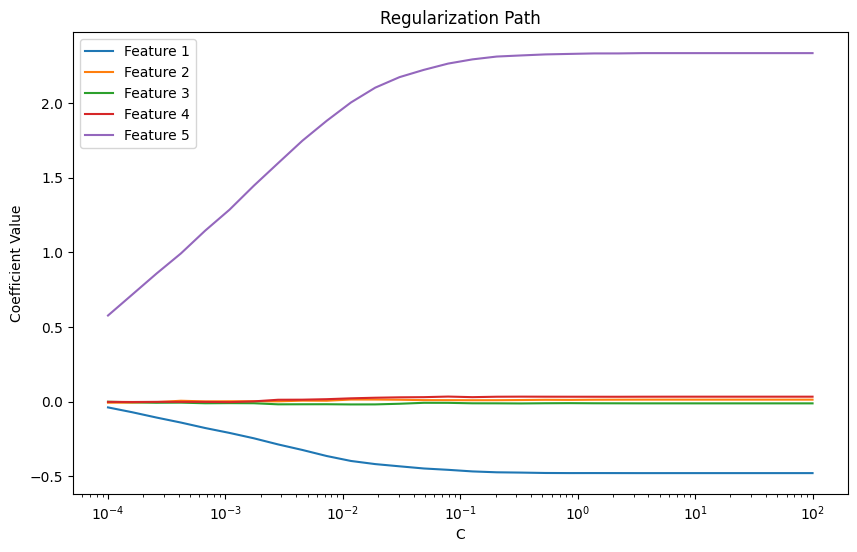

In [ ]:
## solve FairSVM and show path solution via `plqERM_Ridge_path_sol`
from rehline import plqERM_Ridge_path_sol

Cs, times, n_iters, losses, norms, coefs = plqERM_Ridge_path_sol(
     X, y, loss=loss, Cs=Cs, max_iter=2000000,tol=1e-4,verbose=2,
     warm_start=True, constraint=constraint, return_time=True)

#### `Quantile regression` without any constraint

In [ ]:
## simulate data
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

n, d = 10000, 5
X, y = make_regression(n_samples=n, n_features=d, noise=1.0)
X = scaler.fit_transform(X)
## add intercept
X = np.hstack((X,np.ones((n,1))))
y = y/y.std()

In [ ]:
## define loss function
loss={'name': 'QR', 'qt': 0.05}

# define value of Cs
Cs = np.logspace(-5,0,20)


PLQ ERM Path Solution Results
C Value        Iterations     Time (s)            Loss                L2 Norm             
------------------------------------------------------------------------------------------
1e-05          0              0.004709            3543.001300         0.058100            
1.833e-05      0              0.003891            3277.611200         0.104300            
3.36e-05       0              0.003566            2835.021100         0.183600            
6.158e-05      0              0.003944            2176.310400         0.308200            
0.0001129      0              0.003700            1435.686300         0.464300            
0.0002069      0              0.003558            905.373700          0.596400            
0.0003793      3              0.007558            286.819900          0.801800            
0.0006952      2              0.006340            101.797200          0.911600            
0.001274       2              0.006275            10.476100

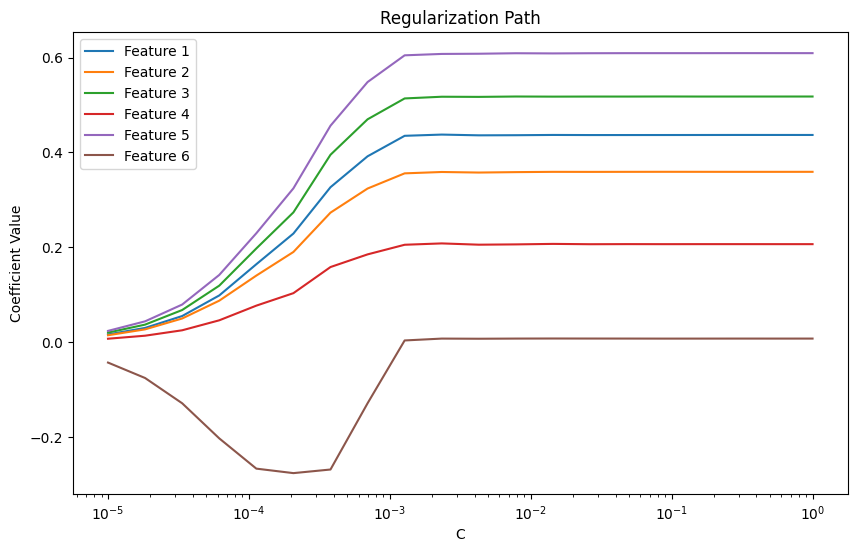

In [ ]:
## solve QR and show path solution via `plqERM_Ridge_path_sol`
from rehline import plqERM_Ridge_path_sol

Cs, times, n_iters, losses, norms, coefs = plqERM_Ridge_path_sol(
     X, y, loss=loss, Cs=Cs, max_iter=10000,tol=1e-4,verbose=2,
     warm_start=True, return_time=True)

#### `Ridge Composite Quantile Regression`

In [2]:
## simulate data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
from sklearn.preprocessing import StandardScaler

X, y = make_friedman1(n_samples=500, n_features=6, noise=1.0, random_state=42)
X = StandardScaler().fit_transform(X)
y = y / y.std()

In [3]:
## define the quantiles
quantiles = [0.1, 0.5, 0.9]
## define the value of Cs
Cs = np.logspace(-4, 0, 30) 

In [5]:
## solve the Ridge Composite Quantile Regression
from rehline import CQR_Ridge_path_sol
Cs, models, coefs, intercepts, fit_times = CQR_Ridge_path_sol(
    X, y,
    quantiles=quantiles,
    Cs=Cs,
    max_iter=100000,
    tol=1e-4,
    verbose=0,
    shrink=1,
    warm_start=True,
    return_time=True
)

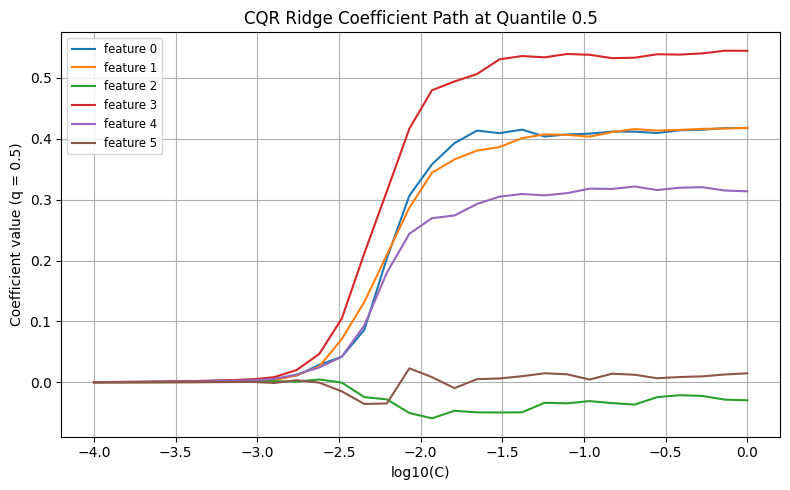

In [6]:
target_index = 1  
log_Cs = np.log10(Cs)

## Coefficient path plot
plt.figure(figsize=(8, 5))
for j in range(coefs.shape[2]):  
    plt.plot(log_Cs, coefs[:, target_index, j], label=f"feature {j}")
plt.xlabel("log10(C)")
plt.ylabel(f"Coefficient value (q = {quantiles[target_index]})")
plt.title(f"CQR Ridge Coefficient Path at Quantile {quantiles[target_index]}")
plt.grid(True)
plt.legend(loc="best", fontsize="small")
plt.tight_layout()
plt.show()

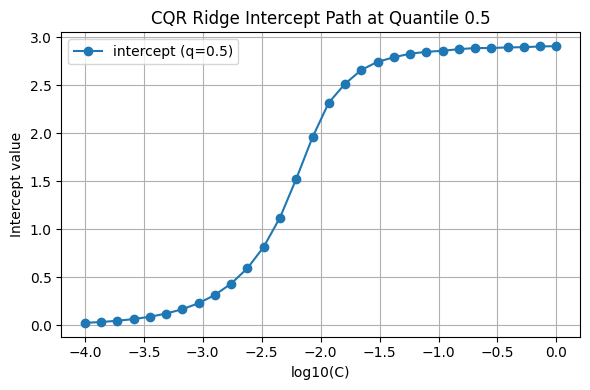

In [7]:
## Intercept path plot
plt.figure(figsize=(6, 4))
plt.plot(log_Cs, intercepts[:, target_index], marker='o', label=f"intercept (q={quantiles[target_index]})")
plt.xlabel("log10(C)")
plt.ylabel("Intercept value")
plt.title(f"CQR Ridge Intercept Path at Quantile {quantiles[target_index]}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()